## General notebook for plotting band structures

Some handy tools

In [1]:
# Imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.colors as colors
import numpy as np
from numpy.lib.scimath import sqrt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


$B = 
\begin{bmatrix}
    A1       & g_0 f(k)  &  0       & g_1 \\
    g_0 f^*(k)       & B1  & 0       & 0 \\
    0       & 0  &  A2       & g_0 f(k) \\
    g_1      & 0  & g_0 f^*(k)      & B2 \\
\end{bmatrix}
$
for AB bilayer systems

In [2]:
# Functions -- note that these work for lists of kx and ky, so there is no need to loop!
# These get the eigenvalues by directly solving the eigenvalues for each k

def fk(kx, ky):
    return 1 + 2*np.exp(1j*np.sqrt(3)*kx/2.0)*np.cos(ky/2)

def mlenergies (kx, ky, g0, A1, B1):
    evals = np.zeros((len(kx), 2))
    for i, (k1, k2) in enumerate(zip(kx, ky)):
        Bmat = np.zeros([2,2], dtype=complex)
        Bmat[0,0] = A1; Bmat[1,1] = B1; 
        Bmat[0,1] = g0*fk(k1, k2); 
        Bmat[1,0] = np.conjugate(g0*fk(k1, k2)) 
        evals[i] = np.linalg.eigvalsh(Bmat)
    return evals.T

def AB_energies (kx, ky, g0, g1, A1, B1, A2, B2):
    evals = np.zeros((len(kx), 4))
    for i, (k1, k2) in enumerate(zip(kx, ky)):
        Bmat = np.zeros([4,4], dtype = complex)
        Bmat[0,0] = A1; Bmat[1,1] = B1; Bmat[2,2] = A2; Bmat[3,3] = B2
        Bmat[0,1] = g0*fk(k1, k2); Bmat[2,3] = Bmat[0,1]
        Bmat[1,0] = np.conjugate(g0*fk(k1, k2)); Bmat[3,2] = Bmat[1,0]
        Bmat[0,3] = g1; Bmat[3,0] = g1
        evals[i] = np.linalg.eigvalsh(Bmat)
    return evals.T

def AA_energies (kx, ky, g0, g1, A1, B1, A2, B2):
    evals = np.zeros((len(kx), 4))
    for i, (k1, k2) in enumerate(zip(kx, ky)):
        Bmat = np.zeros([4,4], dtype = complex)
        Bmat[0,0] = A1; Bmat[1,1] = B1; Bmat[2,2] = A2; Bmat[3,3] = B2
        Bmat[0,1] = g0*fk(k1, k2); Bmat[2,3] = Bmat[0,1]
        Bmat[1,0] = np.conjugate(g0*fk(k1, k2)); Bmat[3,2] = Bmat[1,0]
        Bmat[1,3] = g1; Bmat[3,1] = g1
        Bmat[0,2] = g1; Bmat[2,0] = g1
        evals[i] = np.linalg.eigvalsh(Bmat)
    return evals.T

# Approximate the delta function for DOS
def delta1(x):
    return (1/np.pi)*(eps/(x**2 + eps**2))

# Function for the calculation of DOS with delta function
def dos(E, eee):
    D = 0
    for i in range(len(eee)):
        D += delta1(E-eee[i])
    return D


In [3]:
# k grids
# high-sym points
KX = (4*np.pi/3) * np.array((np.sqrt(3)/2, 0, np.sqrt(3)/2, np.sqrt(3)/2))
KY = (4*np.pi/3) * np.array((-1/2, 0, 0, 1/2))

# paths between high-sym points
kx = np.array([np.linspace(KX[i], KX[i+1], 50) for i in range(0, len(KX)-1)]).flatten()
ky = np.array([np.linspace(KY[i], KY[i+1], 50) for i in range(0, len(KY)-1)]).flatten()
N = len(kx)
print(N)

# k-grid for 3D plot
kv1 = np.linspace(KX[0] - 0.3, KX[0] + 0.3, 101)
kv2 = np.linspace(KY[0] - 0.3, KY[0] + 0.3, 101)
kvx, kvy = np.meshgrid(kv1, kv2)
kvxa = kvx.ravel()
kvya = kvy.ravel()


150


In [154]:
# parameters
g0 = -1.0
g1 = 0.12
delta = 0.0

# pristine bilayer case
pristine = (g0, g1, 0.0, 0.0, 0.0, 0.0)

# bilayer with a bias on the two layers
biased = (g0, g1, delta, delta, -delta, -delta)


In [172]:
# Calculation of energies
g0, g1, A1, B1, A2, B2 = pristine   ##  sets which parameters to use
Es = AB_energies(kx, ky, g0, g1, A1, B1, A2, B2)  ##  energies along high symmetry path
Es2 =  AB_energies(kvxa, kvya, g0, g1, A1, B1, A2, B2)  ##  calculates energies for 3D and near cone
eea = Es2.flatten()


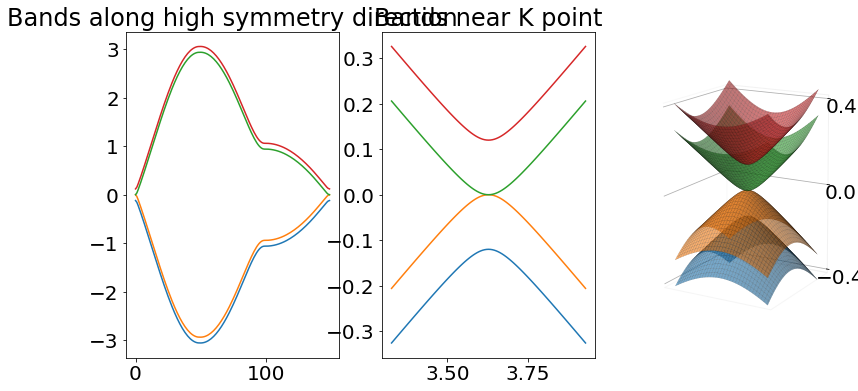

In [173]:
# Plotting
# Band structures, comparison with pristine near K, and 3D bands near K
plot1 = plt.figure(figsize = (13,6))
ax = plot1.add_subplot(131)
ax.set_title("Bands along high symmetry direction")
for i, E in enumerate(Es):
    ax.plot(E, c = colors[i])

ax = plot1.add_subplot(132)
ax.set_title("Bands near K point")
for i, E in enumerate(Es2):
    Etemp = E.reshape(kvx.shape)[int(len(kvx)/2)]
    ax.plot(kvx[0], Etemp, color = colors[i])

ax2 = plot1.add_subplot(133, projection = '3d', )
ax2.view_init(10,)
ax2.set_zlim(-0.3, 0.3)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([-0.4, 0.0, 0.4])
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
ax2.xaxis.line.set_linewidth(0)
ax2.yaxis.line.set_linewidth(0)
ax2.zaxis.line.set_linewidth(0)

for i, E in enumerate(Es2):
    Etemp = E.reshape(kvx.shape)
    ax2.plot_surface(kvx, kvy, Etemp, alpha = 0.6, color = colors[i], rstride = 3,cstride = 3, edgecolor='black', linewidth=0.1)
plt.tight_layout
plt.show()


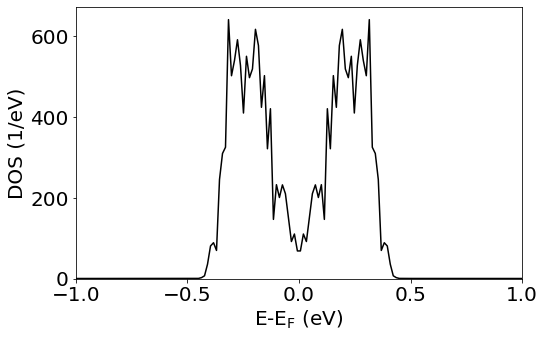

In [174]:
en = 150 # Points in energy space
ene = 1.0 # Range in energy space
e333 = np.linspace(-ene, ene, en).tolist() # Define the energy range
eps = 0.0001 # Parameter for DOS calculation, delta function
tdos = []
matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize = (8, 5))
plt.rcParams["font.family"] = "Times New Roman"
ev = []
dos0 = dos(e333, eea)/N
plt.plot(e333, dos0, c = 'k')
plt.ylim(0, )
plt.xlim(-1, 1)
plt.xlabel('E-E$\mathrm{_{F}}$ (eV)')
plt.ylabel('DOS (1/eV)')
plt.show()


In [169]:
# Calculation of energies
#g0, 0, 0 = pristine   ##  sets which parameters to use
Es2 = mlenergies(kvxa, kvya, g0, 0, 0)  ##  energies along high symmetry path
#Es2 =  AB_energies(kvxa, kvya, g0, g1, A1, B1, A2, B2)  ##  calculates energies for 3D and near cone
eea = Es2.flatten()


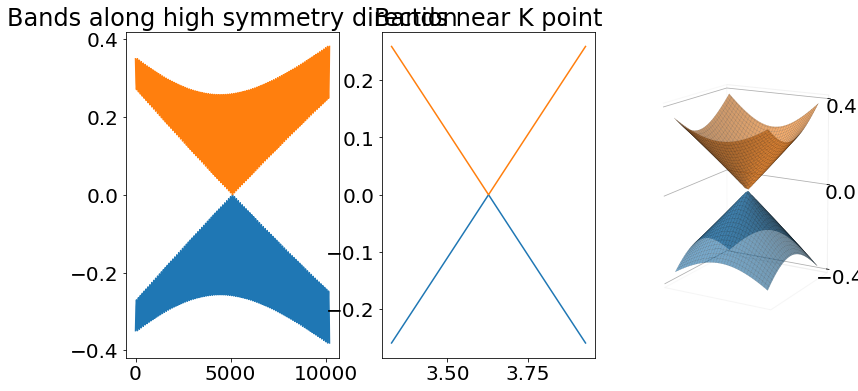

In [170]:
# Plotting
# Band structures, comparison with pristine near K, and 3D bands near K
plot1 = plt.figure(figsize = (13,6))
ax = plot1.add_subplot(131)
ax.set_title("Bands along high symmetry direction")
for i, E in enumerate(Es):
    ax.plot(E, c = colors[i])

ax = plot1.add_subplot(132)
ax.set_title("Bands near K pointband structure for tblg")
for i, E in enumerate(Es2):
    Etemp = E.reshape(kvx.shape)[int(len(kvx)/2)]
    ax.plot(kvx[0], Etemp, color = colors[i])

ax2 = plot1.add_subplot(133, projection = '3d', )
ax2.view_init(10,)
ax2.set_zlim(-0.3, 0.3)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([-0.4, 0.0, 0.4])
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
ax2.xaxis.line.set_linewidth(0)
ax2.yaxis.line.set_linewidth(0)
ax2.zaxis.line.set_linewidth(0)

for i, E in enumerate(Es2):oliday)	Assessment* (Monda
    Etemp = E.reshape(kvx.shape)
    ax2.plot_surface(kvx, kvy, Etemp, alpha = 0.6, color = colors[i], rstride = 3, cstride = 3, edgecolor='black', linewidth=0.1)
plt.tight_layout
plt.show()


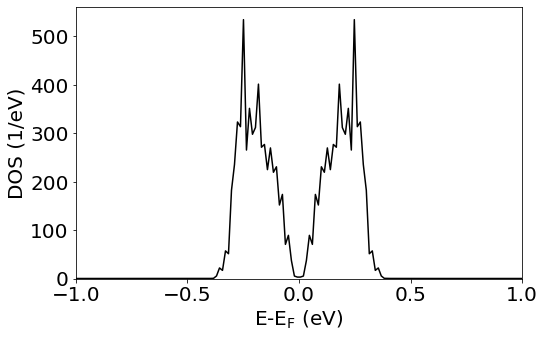

In [171]:
en = 150 # Points in energy space
ene = 1.0 # Range in energy space
e333 = np.linspace(-ene, ene, en).tolist() # Define the energy range
eps = 0.0001 # Parameter for DOS calculation, delta function
tdos = []
matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize = (8, 5))
plt.rcParams["font.family"] = "Times New Roman"
ev = []
dos0 = dos(e333, eea)/N
plt.plot(e333, dos0, c = 'k')
plt.ylim(0, )
plt.xlim(-1, 1)
plt.xlabel('E-E$\mathrm{_{F}}$ (eV)')
plt.ylabel('DOS (1/eV)')
plt.show()


In [175]:
# Calculation of energies
g0, g1, A1, B1, A2, B2 = pristine   ##  sets which parameters to use
Es = AA_energies(kx, ky, g0, g1, A1, B1, A2, B2)  ##  energies along high symmetry path
Es2 =  AA_energies(kvxa, kvya, g0, g1, A1, B1, A2, B2)  ##  calculates energies for 3D and near cone
eea = Es2.flatten()


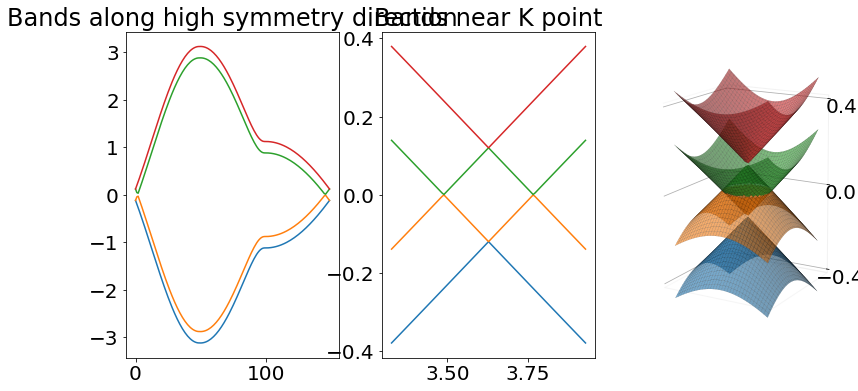

In [176]:
# Plotting
# Band structures, comparison with pristine near K, and 3D bands near K
plot1 = plt.figure(figsize = (13,6))
ax = plot1.add_subplot(131)
ax.set_title("Bands along high symmetry direction")
for i, E in enumerate(Es):
    ax.plot(E, c = colors[i])

ax = plot1.add_subplot(132)
ax.set_title("Bands near K point")
for i, E in enumerate(Es2):
    Etemp = E.reshape(kvx.shape)[int(len(kvx)/2)]
    ax.plot(kvx[0], Etemp, color = colors[i])

ax2 = plot1.add_subplot(133, projection = '3d', )
ax2.view_init(10,)
ax2.set_zlim(-0.3, 0.3)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([-0.4, 0.0, 0.4])
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
ax2.xaxis.line.set_linewidth(0)
ax2.yaxis.line.set_linewidth(0)
ax2.zaxis.line.set_linewidth(0)

for i, E in enumerate(Es2):
    Etemp = E.reshape(kvx.shape)
    ax2.plot_surface(kvx, kvy, Etemp, alpha = 0.6, color = colors[i], rstride = 3,cstride = 3, edgecolor='black', linewidth=0.1)
plt.tight_layout
plt.show()


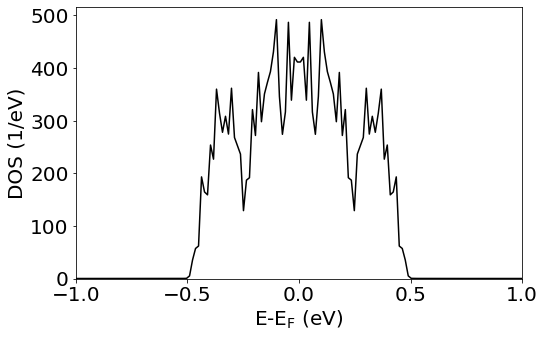

In [177]:
en = 150 # Points in energy space
ene = 1.0 # Range in energy space
e333 = np.linspace(-ene, ene, en).tolist() # Define the energy range
eps = 0.0001 # Parameter for DOS calculation, delta function
tdos = []
matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize = (8, 5))
plt.rcParams["font.family"] = "Times New Roman"
ev = []
dos0 = dos(e333, eea)/N
plt.plot(e333, dos0, c = 'k')
plt.ylim(0, )
plt.xlim(-1, 1)
plt.xlabel('E-E$\mathrm{_{F}}$ (eV)')
plt.ylabel('DOS (1/eV)')
plt.show()
